In [31]:
import os
import cv2     # for capturing videos
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split  # for preprocessing the images
import numpy as np    # for mathematical operations
from tensorflow.keras.applications import VGG16
from matplotlib import pyplot as plt 
from skimage.transform import resize   # for resizing images

In [16]:
count = 0
videoFile = "Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


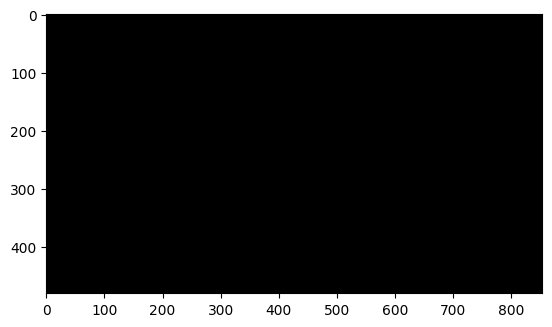

In [17]:
img = plt.imread('0.jpg')   # reading image using its name
plt.imshow(img)

In [18]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [19]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [21]:
y = data.Class
dummy_y = to_categorical(y)


In [22]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [23]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X,data_format=None)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [26]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [39]:
from keras.applications import VGG16

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


AttributeError: module 'keras.src.backend' has no attribute 'RandomGenerator'

In [37]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

NameError: name 'base_model' is not defined

In [ ]:
X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [ ]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [ ]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 1s 149ms/step - loss: 0.6712 - accuracy: 0.6516 - val_loss: 0.7715 - val_accuracy: 0.7463
Epoch 2/100
5/5 [==============================] - 1s 117ms/step - loss: 0.2626 - accuracy: 0.8903 - val_loss: 0.7881 - val_accuracy: 0.7463
Epoch 3/100
5/5 [==============================] - 1s 121ms/step - loss: 0.1544 - accuracy: 0.9613 - val_loss: 0.8141 - val_accuracy: 0.7015
Epoch 4/100
5/5 [==============================] - 1s 117ms/step - loss: 0.0917 - accuracy: 0.9806 - val_loss: 0.8230 - val_accuracy: 0.7015
Epoch 5/100
5/5 [==============================] - 1s 122ms/step - loss: 0.0661 - accuracy: 0.9871 - val_loss: 0.7856 - val_accuracy: 0.7463
Epoch 6/100
5/5 [==============================] - 1s 120ms/step - loss: 0.0448 - accuracy: 0.9935 - val_loss: 0.7814 - val_accuracy: 0.7761
Epoch 7/100
5/5 [==============================] - 1s 119ms/step - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.7850 - val_accuracy: 0.7761
Epoch 8/100
5

Epoch 59/100
5/5 [==============================] - 1s 119ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8315 - val_accuracy: 0.8060
Epoch 60/100
5/5 [==============================] - 1s 114ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.8321 - val_accuracy: 0.8209
Epoch 61/100
5/5 [==============================] - 1s 118ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.8326 - val_accuracy: 0.8358
Epoch 62/100
5/5 [==============================] - 1s 116ms/step - loss: 9.9497e-04 - accuracy: 1.0000 - val_loss: 0.8339 - val_accuracy: 0.8358
Epoch 63/100
5/5 [==============================] - 1s 115ms/step - loss: 9.6846e-04 - accuracy: 1.0000 - val_loss: 0.8344 - val_accuracy: 0.8358
Epoch 64/100
5/5 [==============================] - 1s 119ms/step - loss: 9.4403e-04 - accuracy: 1.0000 - val_loss: 0.8357 - val_accuracy: 0.8209
Epoch 65/100
5/5 [==============================] - 1s 118ms/step - loss: 9.2136e-04 - accuracy: 1.0000 - val_loss: 0.8362 - val_accurac

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
count = 0
videoFile = "Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [ ]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [ ]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

(9, 7, 7, 512)

In [ ]:
test_image = test_image.reshape(9, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [ ]:
predictions = model.predict(test_image)

In [ ]:
print(predictions)

[[6.1990404e-06 9.9999380e-01]
 [4.5403195e-04 9.9954599e-01]
 [2.8850536e-03 9.9711490e-01]
 [8.8058825e-04 9.9911946e-01]
 [2.2507354e-03 9.9774927e-01]
 [7.1023732e-01 2.8976271e-01]
 [9.1785437e-01 8.2145646e-02]
 [8.3563751e-01 1.6436252e-01]
 [9.1031182e-01 8.9688160e-02]]


In [ ]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")
    

No Accident
No Accident
No Accident
No Accident
No Accident
Accident
Accident
Accident
Accident


In [ ]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid = 'AC0936489db730d263677c5c5a326b3913'
auth_token = 'ac420b6b789ef386e9157261272e3580'
client = Client(account_sid, auth_token)

In [ ]:
cap = cv2.VideoCapture('Accident-1.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(
                 body="Accident detected in "+locname.address,
                 from_='+16592461899',
                 to= '+919952639811' )

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()


SyntaxError: invalid syntax (Temp/ipykernel_9300/2088638982.py, line 30)

In [33]:
!pip install --upgrade keras
!pip install --upgrade tensorflow


  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.15.0 which is incompatible.


  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
